In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\..'))
	print(os.getcwd())
except:
	pass


C:\Users\Thomas Athey\Documents\Labs\Labs\jovo\dos_and_donts


In [2]:
import numpy as np
from math import sqrt
from scipy.stats import pearsonr
from graspy.plot import heatmap
from sklearn.covariance import GraphicalLassoCV
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
def gen_data(n,m,t,noise_sig):
    data = np.random.normal(0,1,(n-1,t,m))
    n0 = np.expand_dims(data[0,:,:] + data[1,:,:],axis=0)
    data = np.concatenate((n0,data),axis=0)
    connectomes = []
    y = []
    
    for subject in range(m):
        connectome = np.corrcoef(data[:,:,subject])
        connectomes.append(connectome)
        y.append(connectome[0,1] + np.random.normal(0,noise_sig))

    connectomes = np.stack(connectomes,axis=2)
    y = np.array(y)
    
    return connectomes, y

In [4]:
def calc_values_lasso(connectomes,y):

    n = connectomes.shape[0]
    
    features = []
    features.append(y)
    for i in range(0,n):
        for j in range(i+1,n):
            edges = connectomes[i,j,:]
            features.append(edges)

    features = np.stack(features,axis=1)
    
    #All************************************graphical lasso
    inds = np.triu_indices(n=n,k=1)

    model = GraphicalLassoCV(cv=3)
    model.fit(features)
    cov_ = model.covariance_
    diags = np.power(np.diagonal(cov_),-1/2)
    scale = np.diag(diags)
    feature_corr_ = scale @ cov_ @ scale

    edge_corrs = np.zeros((n,n))
    edge_corrs[inds] = feature_corr_[0,1:]
    edge_corrs = edge_corrs + edge_corrs.T
    
    prec_ = model.precision_
    diags = np.power(np.diagonal(cov_),1/2)
    scale = np.diag(diags)
    feature_invcorr_ = scale @ prec_ @ scale
    
    
    edge_invcorrs = np.zeros((n,n))
    edge_invcorrs[inds] = feature_invcorr_[0,1:]
    edge_invcorrs = edge_invcorrs + edge_invcorrs.T
    
    cor_true = edge_corrs[0,1]
    cor_spurious = edge_corrs[1,2]
    invcor_true = edge_invcorrs[0,1]
    invcor_spurious = edge_invcorrs[1,2]
    
    return cor_true, cor_spurious, invcor_true, invcor_spurious

In [5]:
def calc_values_normal(connectomes,y):

    n = connectomes.shape[0]
    
    features = []
    features.append(y)
    for i in range(0,n):
        for j in range(i+1,n):
            edges = connectomes[i,j,:]
            features.append(edges)

    features = np.stack(features,axis=1)
    
    #All************************************graphical lasso
    inds = np.triu_indices(n=n,k=1)

    feature_corr_ = np.corrcoef(features)
    feature_invcorr_ = np.linalg.inv(feature_corr_)
    
    
    edge_invcorrs = np.zeros((n,n))
    edge_invcorrs[inds] = feature_invcorr_[0,1:]
    edge_invcorrs = edge_invcorrs + edge_invcorrs.T
    
    cor_true = edge_corrs[0,1]
    cor_spurious = edge_corrs[1,2]
    invcor_true = edge_invcorrs[0,1]
    invcor_spurious = edge_invcorrs[1,2]
    
    return cor_true, cor_spurious, invcor_true, invcor_spurious

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3052285475465284e-09, tolerance: 3.6677801185320155e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4329537983710089e-09, tolerance: 9.140801515549249e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0507921110000243e-10, tolerance: 3.6677801185320155e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarni

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0749466516723283e-11, tolerance: 1.7280582575343776e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1020875628655995e-09, tolerance: 5.112931114785916e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.898725936414988e-10, tolerance: 2.6018998822324217e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarnin

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.021546351478834e-11, tolerance: 3.005602266022339e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0139399866590515e-10, tolerance: 8.956478206662217e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.139081161434269e-09, tolerance: 4.679396524578358e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.052007475151154e-11, tolerance: 3.85210965373315e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5353693641993738e-10, tolerance: 3.952535068404956e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.929499011615285e-11, tolerance: 3.952535068404956e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: O

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.501332618556998e-11, tolerance: 3.909844970989244e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.970299741441711e-11, tolerance: 3.909844970989244e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9248620590234938e-10, tolerance: 3.505302327810419e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.607165343673003e-11, tolerance: 3.74022468048186e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.643761722129906e-10, tolerance: 3.74022468048186e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.351988217901002e-10, tolerance: 4.513990297042547e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Obj

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8832406075282244e-09, tolerance: 4.643424483672084e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1912426137232696e-08, tolerance: 3.650065212401988e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.568090806779599e-08, tolerance: 4.2609261552675785e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1719619339659731e-10, tolerance: 3.650065212401988e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.184702129088336e-11, tolerance: 2.9095787805703572e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.831984820541634e-11, tolerance: 4.643424483672084e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7125933620776874e-11, tolerance: 2.8079328653414207e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1311877086070399e-10, tolerance: 1.0585780158535028e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.182028677350569e-10, tolerance: 5.983318432404713e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarnin

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2164654650346357e-09, tolerance: 5.753555551421964e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.409903575803344e-10, tolerance: 5.753555551421964e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4817252697317826e-09, tolerance: 6.396988523278777e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0848040011852272e-09, tolerance: 4.786003008276215e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.596522395159454e-10, tolerance: 5.079332476824941e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4814750831258425e-10, tolerance: 4.786003008276215e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.06771466139933e-11, tolerance: 1.3482922862945277e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0343102166843893e-10, tolerance: 7.253699910726888e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.103762267131922e-09, tolerance: 6.401951485859407e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.869505188855554e-09, tolerance: 5.231206691121518e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3213743904941753e-09, tolerance: 3.3961003479545955e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5119831936109074e-10, tolerance: 5.231206691121518e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9390963534573107e-08, tolerance: 4.8306945533865127e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.235488233116048e-09, tolerance: 3.552906532208022e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.267256526093276e-10, tolerance: 1.2512086538501673e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.283424357661279e-09, tolerance: 2.29853892116624e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3802533417736508e-09, tolerance: 2.800404682339812e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8767299903531525e-09, tolerance: 2.29853892116624e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: O

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.488428460477407e-09, tolerance: 5.391811014003294e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4131669716799938e-10, tolerance: 5.955488343559418e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.790644237643443e-10, tolerance: 1.381167576322827e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.954618866634576e-09, tolerance: 4.8527205505168217e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2344819444335426e-10, tolerance: 4.8527205505168217e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0261762311203002e-10, tolerance: 4.8527205505168217e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarni

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3691587124578693e-10, tolerance: 2.487290031837403e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.222614532339852e-11, tolerance: 2.879703596330104e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.529748414841428e-09, tolerance: 8.45121106395238e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: O

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.526282948296394e-09, tolerance: 5.510163918187579e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.258515110841041e-10, tolerance: 5.802515992319877e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4137166860338918e-10, tolerance: 4.395915428484418e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.683711018652192e-11, tolerance: 2.0896660881633836e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3672264253909716e-10, tolerance: 8.788814759920107e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5609253292459764e-08, tolerance: 6.605817113344326e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.152537991957729e-09, tolerance: 5.884017849835172e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.265815623854269e-10, tolerance: 2.7563552085272038e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.165092996379847e-10, tolerance: 5.884017849835172e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2759494983093376e-10, tolerance: 5.1374978193789894e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9532184843042838e-10, tolerance: 5.1374978193789894e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2263628173181264e-10, tolerance: 9.567552544099244e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarni

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.520737016752626e-10, tolerance: 3.7383780474082944e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.220513954722755e-09, tolerance: 4.591403079662535e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1061393207027924e-09, tolerance: 7.555847800098388e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.468236910972872e-10, tolerance: 2.5029087446370995e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.385342793171901e-10, tolerance: 1.025062935661089e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.40482751213352e-09, tolerance: 1.1470086983989296e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8651868491701496e-10, tolerance: 5.193645942073025e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.952182963089164e-11, tolerance: 5.193645942073025e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.096178077656626e-11, tolerance: 5.193645942073025e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.705219368565059e-11, tolerance: 1.975591502901144e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.504552908041662e-10, tolerance: 8.040037432064832e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6673308185711387e-08, tolerance: 4.479648540845646e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6875903318325104e-11, tolerance: 1.8244077909067374e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1498931017442371e-10, tolerance: 8.765245987674577e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.2374552107764425e-09, tolerance: 2.7947252784200626e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarni

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.05101444482465e-11, tolerance: 2.3004224856257136e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.597443559809425e-10, tolerance: 9.17963362137532e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.395109946157398e-11, tolerance: 4.243333951091746e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Ob

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.058973818203652e-11, tolerance: 3.3076348004997905e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3360521998635744e-10, tolerance: 1.2367385812692217e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5120315903673935e-11, tolerance: 3.270592159703287e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarnin

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1100185737098903e-10, tolerance: 3.78190517876077e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.610926342626779e-10, tolerance: 7.178253851421948e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9750955862138375e-10, tolerance: 7.178253851421948e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.871548339822977e-10, tolerance: 4.467412571461639e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.052332849845223e-10, tolerance: 4.467412571461639e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.428039482052808e-11, tolerance: 2.3220738437129906e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: 

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8194924904615644e-09, tolerance: 4.4887171198849426e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1320094861488883e-10, tolerance: 1.1313823777649303e-10
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.808655860512578e-10, tolerance: 4.4887171198849426e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarni

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8609066913290173e-10, tolerance: 3.445444160404323e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.567801233208978e-09, tolerance: 3.716447259872452e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4510079888920696e-09, tolerance: 3.4306191796057626e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0522563563304423e-11, tolerance: 2.8403738067305372e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.252557094502671e-10, tolerance: 8.54431957913925e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7309308041025974e-11, tolerance: 3.276437407997201e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.566277590443624e-08, tolerance: 5.081159310835606e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.229559862408861e-11, tolerance: 5.081159310835606e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.466176919736651e-11, tolerance: 5.081159310835606e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: O

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5597233290077367e-09, tolerance: 4.451396659862883e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.655317429631435e-10, tolerance: 3.062354287243067e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.485470862868648e-10, tolerance: 4.5545507336784504e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning:

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.852218660906458e-10, tolerance: 4.428992377379382e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.953310655461204e-11, tolerance: 4.428992377379382e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.26249523159178e-11, tolerance: 4.428992377379382e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Ob

c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.776162179171608e-11, tolerance: 2.8680250009408243e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0289071374416925e-10, tolerance: 8.48592228365402e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.271729572515517e-10, tolerance: 2.9620393292003e-11
  check_random_state(None), False)
c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:228: ConvergenceWarning: Ob

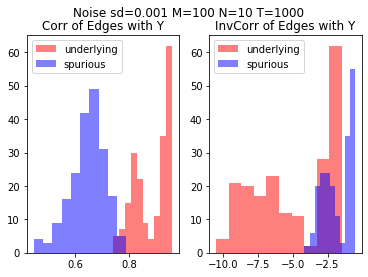

In [6]:
#Distributions of what we are doing

n_iter = 200
sd = 0.001
n=10
m=100
T=1000

distributions = np.zeros((4,n_iter))

for i in range(n_iter):
    connectomes, y = gen_data(n,m,T,sd)
    cor_true, cor_spurious, invcor_true, invcor_spurious = calc_values_lasso(connectomes,y)

    distributions[0,i] = cor_true
    distributions[1,i] = cor_spurious
    distributions[2,i] = invcor_true
    distributions[3,i] = invcor_spurious

    

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(hspace=.5)
ttl = 'Noise sd=' + str(sd) + ' M=' + str(m) + ' N=' + str(n) + ' T=' + str(T)
fig.suptitle(ttl)
axs[0].hist(distributions[0,:],color='red',alpha=0.5,label='underlying')
axs[0].hist(distributions[1,:],color='blue',alpha=0.5,label='spurious')
axs[0].set_title('Corr of Edges with Y')
axs[0].legend()


axs[1].hist(distributions[2,:],color='red',alpha=0.5,label='underlying')
axs[1].hist(distributions[3,:],color='blue',alpha=0.5,label='spurious')
axs[1].set_title('InvCorr of Edges with Y')
axs[1].legend()




In [ ]:
#Distributions of what we are doing

n_iter = 100
sd = 0.1
n=10
m=100
T=1000

distributions = np.zeros((4,n_iter))

for i in range(n_iter):
    connectomes, y = gen_data(n,m,T,sd)
    cor_true, cor_spurious, invcor_true, invcor_spurious = calc_values_normal(connectomes,y)

    distributions[0,i] = cor_true
    distributions[1,i] = cor_spurious
    distributions[2,i] = invcor_true
    distributions[3,i] = invcor_spurious

    


fig, axs = plt.subplots(1,2)
fig.subplots_adjust(hspace=.5)
ttl = 'Noise sd=' + str(sd) + ' M=' + str(m) + ' N=' + str(n) + ' T=' + str(T)
fig.suptitle(ttl)
axs[0].hist(distributions[0,:],color='red',alpha=0.5,label='underlying')
axs[0].hist(distributions[1,:],color='blue',alpha=0.5,label='spurious')
axs[0].set_title('Corr of Edges with Y')
axs[0].legend()


axs[1].hist(distributions[2,:],color='red',alpha=0.5,label='underlying')
axs[1].hist(distributions[3,:],color='blue',alpha=0.5,label='spurious')
axs[1].set_title('Corr of Edges with Y')
axs[1].legend()